# MNIST - Syft Duet - Data Owner 🎸

## PART 1: Launch a Duet Server and Connect

As a Data Owner, you want to allow someone else to perform data science on data that you own and likely want to protect.

In order to do this, we must load our data into a locally running server within this notebook. We call this server a "Duet".

To begin, you must launch Duet and help your Duet "partner" (a Data Scientist) connect to this server.

You do this by running the code below and sending the code snippet containing your unique Server ID to your partner and following the instructions it gives!

In [1]:
# TorchVision hotfix https://github.com/pytorch/vision/issues/1938
from syft.util import get_root_data_path
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [("User-agent", "Mozilla/5.0")]
urllib.request.install_opener(opener)
import torchvision


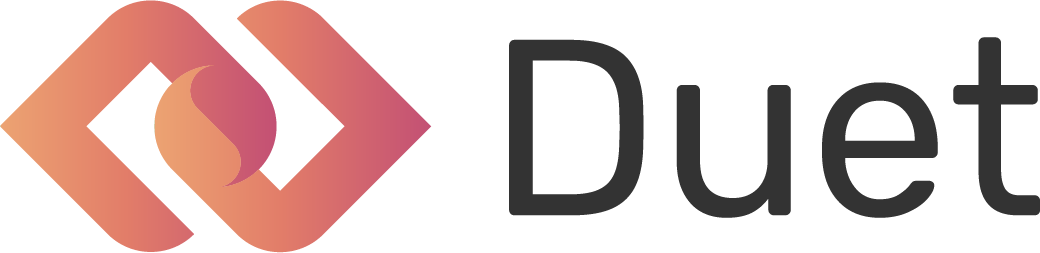

🎤  🎸  ♪♪♪ Starting Duet ♫♫♫  🎻  🎹

♫♫♫ > DISCLAIMER: Duet is an experimental feature currently in beta.
♫♫♫ > Use at your own risk.


    > ❤️ Love Duet? Please consider supporting our community!
    > https://github.com/sponsors/OpenMined

♫♫♫ > Punching through firewall to OpenGrid Network Node at:
♫♫♫ > http://ec2-18-216-8-163.us-east-2.compute.amazonaws.com:5000
♫♫♫ >
♫♫♫ > ...waiting for response from OpenGrid Network... 
♫♫♫ > DONE!

♫♫♫ > STEP 1: Send the following code to your Duet Partner!

import syft as sy
duet = sy.join_duet(loopback=True)

♫♫♫ > Connecting...

♫♫♫ > CONNECTED!



In [2]:
import syft as sy
duet = sy.launch_duet(loopback=True)

If you are in Jupyter Notebook (not Colab) the ☝🏾DUET LIVE STATUS above will animate 

In [3]:
#remote_torchvision = duet.torchvision

In [4]:
# torchvision does not have duet functionalities out-of-the-box. 
# You need to use duet.torchvision instead of torchvision directly like this
# Then you can get the dataset pointer to the remote data like below
# In this example, instead of the data owner having to upload the dataset to the duet server, 
# we are just using a reference to the dataset already available in torchvision, using remote_torchvision. 
#train_data_ptr = remote_torchvision.datasets.MNIST(str(get_root_data_path()), train=True, download=True, transform=transforms)
# train_loader_ptr = remote_torch.utils.data.DataLoader(train_data_ptr,**train_kwargs)

torchvision.datasets.MNIST(get_root_data_path(), train=True, download=True)
torchvision.datasets.MNIST(get_root_data_path(), train=False, download=True)

Dataset MNIST
    Number of datapoints: 10000
    Root location: /Users/q493551/.syft/data
    Split: Test

## PART 2: Add Request Handlers

The MNIST Data Science Notebook makes a number of requests to access data. You can view these requests with:  
```
duet.requests.pandas
```
Then manually accept or deny them with:
```
duet.requests[0].accept()
```
However for training loops, this can be slow and tedious so the below code will create request handlers which will automatically respond with `accept` or `deny` depending on the name of the request.

In [5]:
duet.requests.pandas

""


In [6]:
duet.requests.add_handler(
    action="accept"
)

[2021-03-31T10:19:49.686526+0200][CRITICAL][logger]][85339] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 34edca5c50b347a9898333a9dd621e1e>.
[2021-03-31T10:31:46.331025+0200][CRITICAL][logger]][85339] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: 2581029ca607484c9c6608c6358c2364>.
[2021-03-31T10:31:47.553613+0200][CRITICAL][logger]][85339] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: e4c973ce3daf406cb1a7be866860445a>.
[2021-03-31T10:31:49.788255+0200][CRITICAL][logger]][85339] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: cbd91e0af9cd41468f1c762dd1a7e944>.
[2021-03-31T10:31:52.008458+0200][CRITICAL][logger]][85339] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: f3cb764cf7bb46fd91aef933921deac4>.
[2021-03-31T10:31:54.225569+0200][CRITICAL][logger]][85339] <class 'syft.core.store.store_memory.MemoryStore'> __delitem__ error <UID: deb401522ee54b9

### <img src="https://github.com/OpenMined/design-assets/raw/master/logos/OM/mark-primary-light.png" alt="he-black-box" width="100"/> Checkpoint 1 : Well done!